### Mie First
Mie theory provides a route to the exact solution to Maxwell's equations for light interacting with a spherical object; this is done by expanding the incident and scattered
light waves in a basis of multi-polar functions; hence one usually speaks about the dipolar contribution to scattering, the quadrupolar contribution, the octupolar, and so on.  For very large particles, many orders of this expansion may be needed, but for small particles the scattering and absorption is dominated by the dipolar contribution.  Hence, for spherical nanoparticles that are less than or equal to about 10 nm in diameter, the Mie theory expansion is truncated after only the first term.  As a concrete example, the Mie theory expression for the absorption of a small spherical nanoparticle is as follows:

\begin{equation}
\sigma_{abs}(\lambda) = \frac{2 \pi}{\lambda} {\rm Im}\left( \alpha(\lambda) \right),
\end{equation}
where $\alpha(\lambda)$ is the dipole polarizability given by
\begin{equation}
\alpha(\lambda) = 4 \pi r^3 \left( \frac{\epsilon_p(\lambda) - \epsilon_s}{\epsilon_p(\lambda) + 2\epsilon_s} \right)
\end{equation}
where $r$ is the radius of the particle, $\epsilon_p(\lambda)$ denotes the wavelength-dependent dielectric function of the material the particle is made from, $\epsilon_s$ denotes the dielectric function of the surroundings (or solvent) that the particle is immersed in, and ${\rm Im}$ means we will only take the imaginary part of the quotient (the dielectric function of the particle will typically be complex; if it is not, there will be no absorption).

We can use WPTherml to get the refractive index of materials as a function of wavelength, which is equivalent to the dielectric function as a function of wavelength by
\begin{equation}
\epsilon_p(\lambda) = n_p(\lambda)^2,
\end{equation}
where $n_p(\lambda)$ is the refractive index of the particle. 


In [1]:
from wptherml.wpml import multilayer
from matplotlib import pyplot as plt
from wptherml.datalib import datalib
import numpy as np
from numpy import linalg as LA
import math

structure = {

        'Material_List': ['Air', 'Ag', 'Air'],
        'Thickness_List': [0,  200e-9, 0],
        'Lambda_List': [200e-9, 700e-9, 2000],
     
        }

### create the silver object - call it sphere for no particular reason
sphere = multilayer(structure)
### get the refractive index of Ag (since it is layer 1 based on the structure above)
n_Ag = sphere.layer_ri(1)
### get the dielectric function of Ag
eps_Ag = n_Ag * n_Ag

'''Lets compute the Mie theory absorption of a 3 nm Ag particle in water, which 
   has refractive index = 1.33, here!'''
r = 3e-9 ### fill in radius here, use meters!
eps_s =  1.00 ### fill in dielectric function of water here!
quotient = (eps_Ag - eps_s)/(eps_Ag + 2*eps_s) ### compute the quotient whose Imaginary part you need from Mie theory expression here
alpha = 4*np.pi*r**3 * quotient
pre = 2*np.pi/sphere.lambda_array ### compute pre-factor that depends on wavelength and radius here!
sigma_abs = pre*np.imag(alpha) ### compute full absorption spectrum here!

plt.plot(1240/(sphere.lambda_array*1e9), sigma_abs, 'red')
plt.xlim(1.5, 4)
plt.show()

lidx = np.argmax(sigma_abs)
print(lidx)
print(sigma_abs[lidx])
print(sphere.lambda_array[lidx])

 Temperature not specified!
 Proceeding with default T = 300 K


<Figure size 640x480 with 1 Axes>

617
6.361971774588674e-17
3.543271635817909e-07


Mie theory provides a classical electrodynamics treatment of the absorption of light by matter; of course we can use quantum mechanics to simulate the absorption of light, as well.  In analogy to our previous Mie theory treatment, we can assume that the interaction between our quantum system and light is dominated by dipolar interactions.  In this view, the absorption of light occurs under the following conditions:
(a) the energy associated with the absorbed light matches the energy difference between two energy eigenstates (call the intial energy eigenstate $\psi_i$ and the final energy eigenstate $\psi_f$, note that $E_i$ need not be less than $E_f$).
(b) there is a charge displacement associated with the transition from $\psi_i$ to $\psi_f$; this gives rise to a *transition dipole moment* that is quantified by the expectation value
\begin{equation}
\mu_{if} = \langle \psi_i | \hat{\mu} | \psi_f \rangle,
\end{equation}
where $\hat{\mu}$ is the transition dipole operator, given by $q {\bf r}$ where
$q$ is the charge (for a molecular transition, this would be a single electron charge) and 
${\bf r}$ is the position operator for charged matter.  A bit of dimensional analysis reveals
that the electric field (which has dimensions of electric potential over length) dotted into the dipole operator (which has dimensions of charge times length) has overal dimensions of energy, so we can think of the interaction of a time-varying electric field with the transition dipole moment of a quantum system as a time-varying potential term in its Hamiltonian.  This leads to the typical "light-matter" contribution to Hamiltonians:
\begin{equation}
\hat{H}(t) = \hat{H}_0 - {\bf E}(t) \cdot \hat{\mu},
\end{equation}
where $\hat{H}_0$ is the Hamiltonian for your quantum system in the absence of the time-varying electric field (i.e. in the dark).

### Who's in Liouville now
We can see what impact light has on our quantum system by evolving the quantum state under the influence of the potential exerted by the light.  We can do this either by solving the time-dependent Schr\"odinger equation, or the analog of the time-dependent Schr\"odinger equation for the density matrix, which is called the Liouville equation.

Here we will use the Liouville equation because it permits a simple modification that allows us to model spontaneous emission of absorbed light, and this effect will lead to the appropriate linewidth of the absorption spectrum we will simulate.  Some of you may recall the
Liouville equation has the form
\begin{equation}
\frac{d}{dt} {\bf D}(t) = \frac{-i}{\hbar} [{\bf H}(t),{\bf D}(t)],
\end{equation}
where $[{\bf H}(t),{\bf D}(t)] = {\bf H}(t){\bf D}(t)-{\bf D}(t){\bf H}(t)$ is known as a commutator of the Hamiltonian and Density matrices.  A slightly modified form of the Liouville equation can account for exchange of energy with the surroundings without including additional quantum states corresponding to the surroundings (this is similar in spirit to the Langevin equation!); one such modification is called the Liouville-Lindblad equation, and contains an additional term (known as the Lindblad operator) that models exchange of energy between the system described by ${\bf D}$ and the surrondings:
\begin{equation}
\frac{d}{dt} {\bf D}(t) = \frac{-i}{\hbar} [{\bf H}(t),{\bf D}(t)] + \hat{L}({\bf D}(t)).
\end{equation}

As one example, we can assume that our quantum system in its excited state can undergo spontaneous emission (which could give rise to fluorescence) with some frequency $\gamma$, thereby leading the excited state to the ground state with the same frequency.  A Lindblad operator that takes this into account would have the form
\begin{equation}
\hat{L}({\bf D}(t)) =  2\gamma \langle 2 | {\bf D}(t) | 2 \rangle | 1 \rangle \langle 1 | - 
\gamma \{ |2\rangle \langle 2|, {\bf D}(t) \},
\end{equation}
where $|1\rangle$ represents the ket for the ground state and $|2\rangle$ represents the ket for the excited state.  

We can consider modeling a silver nanoparticle as a quantum system with two energy eigenstates: the ground energy eigenstate (whose energy $E_1$ we can actually consider to be zero) and an excited state (whose energy is related to the absorption energy observed in 
the Mie theory spectrum previously observed, i.e. $E_2 = \frac{h c}{\lambda_{max}}$.
Hence, the Hamiltonian matrix in the basis of energy eigenstates is as follows:
\begin{equation}
{\bf H_0} = \left( \begin{matrix}
    0 & 0 \\
    0 & E_2 \\
\end{matrix} \right).
\end{equation}
Each element is defined as 
\begin{equation}
H_{ij} = \langle \psi_i | \hat{H} | \psi_j \rangle;
\end{equation}
the off-diagonal elements are zero due to the ortonormality of the energy eigenstates, and
element $H_{11} = 0$ due to $E_1$ being zero.  We also need the transition dipole matrix, 
which will contain information about how the system couples to light:
\begin{equation}
{\bf \mu} = \left( \begin{matrix}
    0 & \mu_{12} \\
    \mu_{21} &  0 \\
\end{matrix} \right).
\end{equation}
Again, each element is defined as
\begin{equation}
\mu_{ij} = \langle \psi_i | \hat{\mu} | \psi_j \rangle,
\end{equation}
and the diagonal elements are zero because the transition from any state $\psi_i$ to 
the same state $\psi_i$ does not displace charge (because the states are identical), and
so there is no dipole moment associated with these "transitions".  We can also parameterize the transition dipole moments in terms of Mie theory absorption, and we will return to this parameterization shortly.

For now, we can say we have a Hamiltonian matrix which can describe the interaction of
a 2-level system to a light field:
\begin{equation}
{\bf H}(t) = {\bf H_0} - E(t) \cdot {\bf \mu},
\end{equation}
where the time dependence arises because the electric field associated with light varies
with time.  

Let's imagine the light field is a single-frequency plane wave:
\begin{equation}
E(t) = A \: {\rm exp}(i \omega_2 t),
\end{equation}
where $A$ is the amplitude and $\hbar \omega_2 = E_2$; solving the Liouville-Lindblad equation will reveal that the system transitions periodically between state 1 and state 2, and consequently experiences an oscillating dipole moment whose magnitude is proportional
to the amplitude of the electric field.
The value of this dipole can be computed at any instant in time by multiplying the instantaneous density matrix by the dipole matrix and summing over the diagonal values of the resulting matrix (called taking the trace):
\begin{equation}
\mu(t) = {\rm Tr}\left({\bf D}(t) {\bf \mu} \right).
\end{equation}
In fact, this is what gives rise to the absorption spectrum, which can be computed as 
\begin{equation}
\sigma_{abs}(\omega) = \frac{2\pi}{\lambda \epsilon_0} {\rm Im}( \alpha(\omega) ),
\end{equation}
where the polaribility can be written in terms of the time-dependent electric
field and dipole moment as
\begin{equation}
\alpha(\omega) = \frac{\int_0^T {\rm exp}(i \omega t) \mu(t) dt}{n^2 \int_0^T {\rm exp}(i \omega t) E(t) dt}.
\end{equation}


We can solve the Liouville-Lindblad equation for ${\bf D}(t)$ using a variety of techniques; perhaps the simplest technique is
the so-called Euler method where the Density matrix at a future
time ${\bf D}(t+\Delta t)$ is estimated from the current density
matrix ${\bf D}(t)$ plus an update step which is simply the time-derivative of the current density matrix multiplied by the
finite timestep $\Delta t$;
\begin{equation}
{\bf D}(t+\Delta t) = {\bf D}(t) + \frac{d}{dt} {\bf D}(t) \Delta t,
\end{equation}
where $\frac{d}{dt} {\bf D}(t)$ is determined by evaluating the Liouville-Lindblad equation, meaning we can re-write the update equation directly in terms of the Liouville-Lindblad equation, which involves only the current Density matrix and the Hamiltonian and Lindbladian matrices/operators:
\begin{equation}
{\bf D}(t+\Delta t) = {\bf D}(t) + \left(\frac{-i}{\hbar} [{\bf H}(t),{\bf D}(t)] + \hat{L}({\bf D}(t))\right) \Delta t.
\end{equation}

Create a function called *def Euler* that takes the current density matrix and the Hamiltonian matrix and returns the updated density mateix.  Some helper functions that evaluate the Liouville-Lindblad equations (provided the density matrix and Hamiltonian matrix are supplied) are given below.


In [2]:
'''  
Put your Euler function here!''' 

def Euler(H0, mu, Vint, gamma, D, h, t, tau): 
    #total hamiltonian matrix at current time 
    H = H0-EField(t,tau) * mu 
    #time derivative of density matrix at current time by Liouvelle-Lindblad eqn 
    Ddot = Liouville(H, D) + Lindblad(D, gamma)
    #The new density matrix is defined as the density matrix at current time 
    #plus its time derivative 
    Dnew = D + h*Ddot 
    return Dnew



def Lindblad(D, gamma):
    dim = len(D)
    LD = np.zeros_like(D)
    ### need |g><g|
    bra_1 = CreateBas(dim, 0)
    gm = Form_Rho(bra_1)
    
    for k in range(1,dim):
        bra_k = CreateBas(dim, k)
        km = Form_Rho(bra_k)
        
        ### first term 2*gam*<k|D|k>|g><g|
        t1 = 2*gamma*D[k][k]*gm
        ### second term is |k><k|*D
        t2 = np.dot(km,D)
        ### third term is  D*|k><k|
        t3 = np.dot(D, km)
        LD = LD + t1 - gamma*t2 - gamma*t3
        
    return LD

### Take commutator of H and D to give Ddot
def Liouville(H, D):
    ci = 0.+1j
    return -ci*(np.dot(H,D) - np.dot(D, H))

def EField(t, tau):
    Ef = 0.
    if t<tau:
        Ef = 0.001*np.sin(t*np.pi/tau)*np.sin(t*np.pi/tau)*np.sin(0.1192*t)
    return Ef

def Form_Rho(Psi):

    D = np.outer(Psi,np.conj(Psi))
    return D

### Creates basis vector for state k
### k=0 -> ground state, k=1 -> first excited-state, etc
def CreateBas(dim, k):
    bas = np.zeros(dim)
    bas[k] = 1
    return bas



A slightly more sophisticated update scheme is given by the family of methods known as 
[Runge-Kutta methods](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods), and a particular implementation of this method can be found below in the function called *RK4*.



In [3]:
def RK4(H0, mu, Vint, gamma, D, h, t, tau):
    k1 = np.zeros_like(D)
    k2 = np.zeros_like(D)
    k3 = np.zeros_like(D)
    k4 = np.zeros_like(D)
    D1 = np.zeros_like(D)
    D2 = np.zeros_like(D)
    D3 = np.zeros_like(D)
    D4 = np.zeros_like(D)
    Df = np.zeros_like(D)
    
    ### Get k1
    H1 = H0 - EField(t, tau)*mu + Vint
    D1 = D    
    k1 = h*Liouville(H1,D1) + h*Lindblad(D1, gamma)
    
    ## Update H and D and get k2
    H2 = H0 - EField(t+h/2, tau)*mu + Vint
    D2 = D+k1/2.
    k2 = h*Liouville(H2, D2) + h*Lindblad(D2, gamma)
    
    ### UPdate H and D and get k3
    H3 = H2
    D3 = D+k2/2
    k3 = h*Liouville(H3, D3) + h*Lindblad(D3, gamma) 
    
    ### Update H and D and get K4
    H4 = H0 - EField(t+h, tau)*mu + Vint
    D4 = D+k3
    k4 = h*Liouville(H4, D4) + h*Lindblad(D4, gamma)
    
    Df = D + (1/6.)*(k1 + 2.*k2 + 2*k3 + k4)
    return Df



We will compare the results of the two methods (RK4 and Euler) in 
reproducing the Mie theory spectrum for a 3 nm Ag atom.  
The following Hamiltonian parameters will be used, and should in principle provide good agreement provided the equations of motion are accurately solved:
In atomic units, $E_2 = 0.1275, \mu_{12} = 58.$, and $\gamma=0.0017$ gives excellent agreement with the Mie theory spectrum, as we will see below.

0.0015707963267948967


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


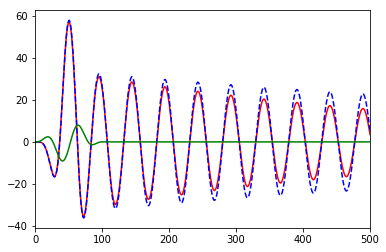

"\nmu_freq_rk4 = np.fft.fft(mu_of_t_rk4)/(Nsteps)\nez_freq = np.fft.fft(ez)/(Nsteps)\nalpha_rk4 = mu_freq_rk4/ez_freq\nlam = 1e-9*1240/(energy*27.211) ### in nm\n\nsigma_rk4 = 2*np.pi/(lam*eps0) * np.imag(alpha_rk4)\nplt.plot(energy*27.211, sigma_rk4, 'red')\n#plt.plot(1240/(sphere.lambda_array*1e9), sigma_abs, 'b--')\nplt.xlim(1.5,4.0)\nplt.ylim(0,1e-16)\n#plt.plot(time, ez, 'red', time, mu_of_t, 'blue')\nplt.show()\n"

In [4]:
### Set up some parameters for the quantum dynamics simulation
dt = 0.1
tau = 100 #150.
gamma = 0.0017
eps0 = 8.854e-12
mu_au_to_si = 8.47835326e-30
E_au_to_si = 5.14220652e11
mu_z = 58.

### Create some arrays
MUZ= np.zeros((2,2),dtype=complex)
Vint = np.zeros((2,2),dtype=complex)
### Density matrix for RK4 updates
D_RK4 = np.zeros((2,2),dtype=complex)
### Density matrix for Euler updates
D_EU  = np.zeros((2,2),dtype=complex)
H0 = np.zeros((2,2))

### initialize values of the arrays for Hamiltonian and Density matrices
H0[0][0] = 0.1275
D_RK4[0][0] = 1.+0j
D_EU[0][0] = 1.+0j
MUZ[0][1] = mu_z
MUZ[1][0] = mu_z

### create arrays for time-dependent quantities
Nsteps = 40000
ez = np.zeros(Nsteps)
### array for mu(t) for RK4 updates
mu_of_t_rk4 = np.zeros(Nsteps,dtype=complex)
### array for mu(t) for Euler updates
mu_of_t_eu = np.zeros(Nsteps,dtype=complex)
time = np.zeros(Nsteps)
energy = np.zeros(Nsteps)


### Run the dynamics
for i in range(0,Nsteps):
    ### reciprocal axis
    energy[i] = np.pi*2*(i+1)/(Nsteps*dt)
    ### time access
    time[i] = i*dt
    ### time-dependent electric field
    ez[i] = EField(i*dt, tau)#*E_au_to_si
    ### update to the Density matrix using RK4
    D_RK4 = RK4(H0, MUZ, Vint, gamma, D_RK4, dt, dt*i, tau)
    D_EU = Euler(H0, MUZ, Vint, gamma, D_EU, dt, dt*i, tau)
    ### Update to mu(t) using RK4
    DMU_RK4 = np.matmul(D_RK4, MUZ)
    DMU_EU = np.matmul(D_EU, MUZ) 
    mu_of_t_rk4[i] = (DMU_RK4[0][0] + DMU_RK4[1][1])#*mu_au_to_si
    mu_of_t_eu[i] = (DMU_EU[0][0] + DMU_EU[1][1])#*mu_au_to_si
    
    ### add update using Euler step!!!

print(energy[0])
plt.plot(time, mu_of_t_rk4, 'red' , time, mu_of_t_eu, 'b--', time, ez*1e4, 'green')
plt.xlim(0,500)
plt.show() 

'''
mu_freq_rk4 = np.fft.fft(mu_of_t_rk4)/(Nsteps)
ez_freq = np.fft.fft(ez)/(Nsteps)
alpha_rk4 = mu_freq_rk4/ez_freq
lam = 1e-9*1240/(energy*27.211) ### in nm

sigma_rk4 = 2*np.pi/(lam*eps0) * np.imag(alpha_rk4)
plt.plot(energy*27.211, sigma_rk4, 'red')
#plt.plot(1240/(sphere.lambda_array*1e9), sigma_abs, 'b--')
plt.xlim(1.5,4.0)
plt.ylim(0,1e-16)
#plt.plot(time, ez, 'red', time, mu_of_t, 'blue')
plt.show()
'''
